In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import scatter_matrix

In [2]:
df = pd.read_hdf("../../data/offset_stat_129.h5", "df")
df1 = pd.read_hdf("../../data/offset_stat_129.h5", "df1")

In [3]:
df0 = pd.concat([df, df1], axis=1)

In [14]:
R200_offsets = [key for key in df0.keys() if "_R200" in key]

In [15]:
offsets = df0.keys() - R200_offsets

In [28]:
df0[offsets].describe()

,offset_FoF_mass,offset_no_wwts,offset_stel_mass
count,129.000000,129.000000,129.000000
mean,6.244648,93.588492,33.074001
std,5.366485,155.389777,106.514465
min,0.019764,1.752930,0.027215
25%,2.488282,27.584135,4.089556
50%,5.438129,58.804352,8.891282
75%,8.084752,107.548730,21.153036
max,39.114404,1475.248483,818.878445


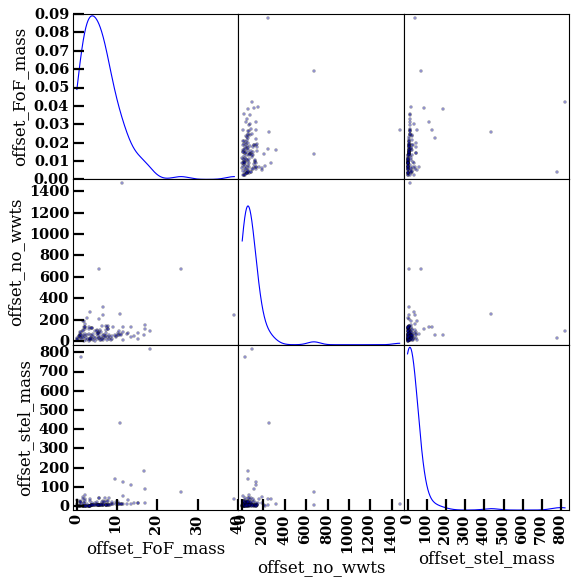

In [26]:
axArray = scatter_matrix(df0[offsets], diagonal='kde', alpha=0.3,
                        figsize=(8, 8))

for axTemp in axArray:
    for ax in axTemp: 
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]): 
            item.set_fontsize(15)
        for item in (ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(13)

In [40]:
import seaborn as sns
sns.set_style("white")

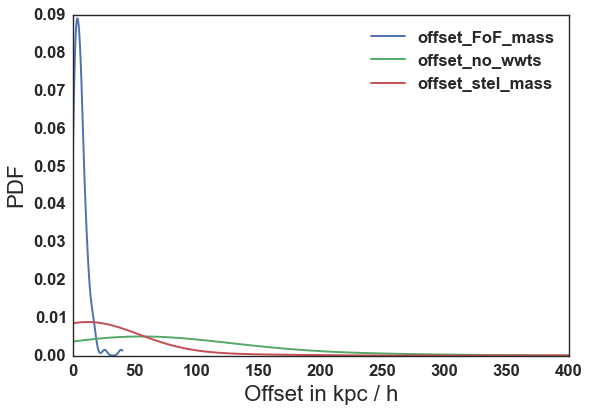

In [56]:
plt.xlabel("Offset in kpc / h", fontsize=20)
plt.ylabel("PDF", fontsize=20)
ax = plt.subplot(111)
for k in offsets:
    sns.kdeplot(df0[k], clip=(0, 400))
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)
        
plt.legend(loc='best', fontsize=15)
    


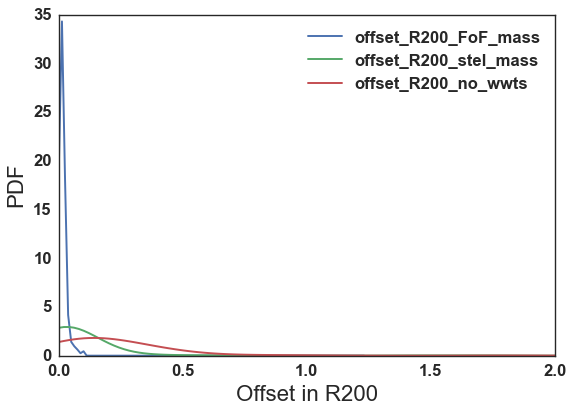

In [57]:
plt.xlabel("Offset in R200", fontsize=20)
plt.ylabel("PDF", fontsize=20)
ax = plt.subplot(111)
for k in R200_offsets:
    sns.kdeplot(df0[k], clip=(0, 2))
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)
    
plt.legend(loc='best', fontsize=15)